In [479]:
import numpy as np
import pandas as pd

In [480]:
df=pd.read_csv("Employee_Performance_Dataset.csv")

In [481]:
df.shape

(5000, 13)

In [482]:
df.head()

,Employee ID,Name,Department,Job Role,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours,Promotion Eligibility
0,376063,Manikya Badami,Sales,Sales Executive,61,91.03,94.40,4.5,78.19,42,3.7,18,No
1,810690,Zara Mahal,Marketing,Marketing Executive,91,83.36,78.45,4.7,71.39,46,4.5,15,Yes
2,520956,Sana Gera,Finance,Accountant,100,65.39,99.50,4.4,80.20,51,3.5,7,No
3,202996,Zoya Wadhwa,Marketing,Content Strategist,100,82.90,79.83,4.3,71.51,43,5.0,9,Yes
4,383410,Baiju Doctor,Sales,Sales Executive,80,90.90,89.92,3.7,78.03,51,3.1,29,No


In [483]:
df.tail()

,Employee ID,Name,Department,Job Role,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours,Promotion Eligibility
4995,491321,Yashvi Barad,Finance,Auditor,56,82.83,79.64,4.6,84.20,45,4.1,5,No
4996,242212,Divyansh Sekhon,HR,Recruitment Specialist,99,88.37,78.85,4.4,87.31,49,4.3,9,Yes
4997,402062,Dhanuk Sankaran,IT,Data Analyst,82,90.61,96.89,3.9,76.09,50,3.5,22,No
4998,268203,Aayush Sampath,Sales,Business Development,88,66.38,83.38,3.1,88.17,36,3.6,5,No
4999,439425,Jayan Magar,HR,Employee Relations,75,61.91,77.20,5.0,91.57,53,4.5,23,No


In [484]:
df.columns

Index(['Employee ID', 'Name', 'Department', 'Job Role', 'Performance Score',
       'KPI Score', 'Attendance (%)', 'Peer Rating', 'Task Completion (%)',
       'Work Hours Logged', 'Manager Feedback', 'Training Hours',
       'Promotion Eligibility'],
      dtype='object')

In [485]:
df.isna().sum()

Employee ID              0
Name                     0
Department               0
Job Role                 0
Performance Score        0
KPI Score                0
Attendance (%)           0
Peer Rating              0
Task Completion (%)      0
Work Hours Logged        0
Manager Feedback         0
Training Hours           0
Promotion Eligibility    0
dtype: int64

In [486]:
df.dtypes

Employee ID                int64
Name                      object
Department                object
Job Role                  object
Performance Score          int64
KPI Score                float64
Attendance (%)           float64
Peer Rating              float64
Task Completion (%)      float64
Work Hours Logged          int64
Manager Feedback         float64
Training Hours             int64
Promotion Eligibility     object
dtype: object

In [487]:
df.drop(['Employee ID','Name'],axis=1,inplace=True)

In [488]:
#checking balanced or unbalanced

promotion=df['Promotion Eligibility'].value_counts()
promotion

Promotion Eligibility
No     4305
Yes     695
Name: count, dtype: int64

<BarContainer object of 2 artists>

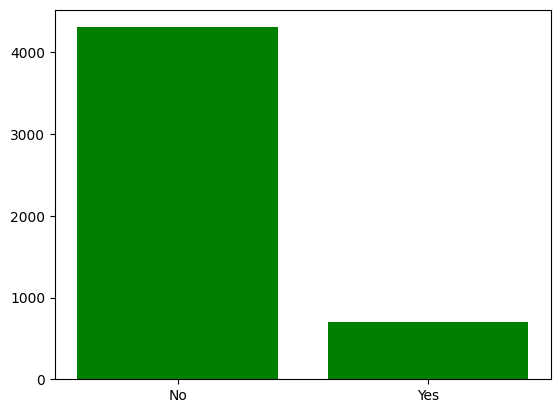

In [489]:
import matplotlib.pyplot as plt
plt.bar(promotion.index,promotion.values,color='g')

In [490]:
dfe=pd.get_dummies(df[['Department','Job Role']],drop_first=True,dtype=int)
dfe

,Department_HR,Department_IT,Department_Marketing,Department_Sales,Job Role_Accountant,Job Role_Auditor,Job Role_Business Development,Job Role_Content Strategist,Job Role_Cybersecurity Specialist,Job Role_Data Analyst,Job Role_Employee Relations,Job Role_Financial Analyst,Job Role_HR Manager,Job Role_Marketing Executive,Job Role_Recruitment Specialist,Job Role_SEO Specialist,Job Role_Sales Executive,Job Role_Software Engineer
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4997,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4998,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [491]:
df1=pd.concat([df,dfe],axis=1)
df1

,Department,Job Role,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours,...,Job Role_Cybersecurity Specialist,Job Role_Data Analyst,Job Role_Employee Relations,Job Role_Financial Analyst,Job Role_HR Manager,Job Role_Marketing Executive,Job Role_Recruitment Specialist,Job Role_SEO Specialist,Job Role_Sales Executive,Job Role_Software Engineer
0,Sales,Sales Executive,61,91.03,94.40,4.5,78.19,42,3.7,18,...,0,0,0,0,0,0,0,0,1,0
1,Marketing,Marketing Executive,91,83.36,78.45,4.7,71.39,46,4.5,15,...,0,0,0,0,0,1,0,0,0,0
2,Finance,Accountant,100,65.39,99.50,4.4,80.20,51,3.5,7,...,0,0,0,0,0,0,0,0,0,0
3,Marketing,Content Strategist,100,82.90,79.83,4.3,71.51,43,5.0,9,...,0,0,0,0,0,0,0,0,0,0
4,Sales,Sales Executive,80,90.90,89.92,3.7,78.03,51,3.1,29,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Finance,Auditor,56,82.83,79.64,4.6,84.20,45,4.1,5,...,0,0,0,0,0,0,0,0,0,0
4996,HR,Recruitment Specialist,99,88.37,78.85,4.4,87.31,49,4.3,9,...,0,0,0,0,0,0,1,0,0,0
4997,IT,Data Analyst,82,90.61,96.89,3.9,76.09,50,3.5,22,...,0,1,0,0,0,0,0,0,0,0
4998,Sales,Business Development,88,66.38,83.38,3.1,88.17,36,3.6,5,...,0,0,0,0,0,0,0,0,0,0


In [492]:
df1.drop(['Department','Job Role'],axis=1,inplace=True)
df1

,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours,Promotion Eligibility,Department_HR,...,Job Role_Cybersecurity Specialist,Job Role_Data Analyst,Job Role_Employee Relations,Job Role_Financial Analyst,Job Role_HR Manager,Job Role_Marketing Executive,Job Role_Recruitment Specialist,Job Role_SEO Specialist,Job Role_Sales Executive,Job Role_Software Engineer
0,61,91.03,94.40,4.5,78.19,42,3.7,18,No,0,...,0,0,0,0,0,0,0,0,1,0
1,91,83.36,78.45,4.7,71.39,46,4.5,15,Yes,0,...,0,0,0,0,0,1,0,0,0,0
2,100,65.39,99.50,4.4,80.20,51,3.5,7,No,0,...,0,0,0,0,0,0,0,0,0,0
3,100,82.90,79.83,4.3,71.51,43,5.0,9,Yes,0,...,0,0,0,0,0,0,0,0,0,0
4,80,90.90,89.92,3.7,78.03,51,3.1,29,No,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,56,82.83,79.64,4.6,84.20,45,4.1,5,No,0,...,0,0,0,0,0,0,0,0,0,0
4996,99,88.37,78.85,4.4,87.31,49,4.3,9,Yes,1,...,0,0,0,0,0,0,1,0,0,0
4997,82,90.61,96.89,3.9,76.09,50,3.5,22,No,0,...,0,1,0,0,0,0,0,0,0,0
4998,88,66.38,83.38,3.1,88.17,36,3.6,5,No,0,...,0,0,0,0,0,0,0,0,0,0


In [493]:
x=df1.drop(['Promotion Eligibility'],axis=1).values



In [494]:
y=df1['Promotion Eligibility'].values

In [495]:
# applying smote (over sampling) to balance data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)


In [496]:
x_resampled

array([[ 61.        ,  91.03      ,  94.4       , ...,   0.        ,
          1.        ,   0.        ],
       [ 91.        ,  83.36      ,  78.45      , ...,   0.        ,
          0.        ,   0.        ],
       [100.        ,  65.39      ,  99.5       , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 93.72955397,  77.59320633,  88.62731109, ...,   0.        ,
          0.        ,   0.        ],
       [ 90.83343269,  90.59549422,  84.62547037, ...,   0.        ,
          0.        ,   0.        ],
       [ 94.40185704,  67.72024077,  99.08252429, ...,   0.        ,
          0.        ,   0.        ]], shape=(8610, 26))

In [497]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)
x_train

array([[8.80000000e+01, 9.42300000e+01, 8.46800000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.40000000e+01, 7.00700000e+01, 7.64600000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.70000000e+01, 8.28400000e+01, 8.32000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.80126714e+01, 9.40907816e+01, 9.47758714e+01, ...,
        0.00000000e+00, 3.16784858e-03, 0.00000000e+00],
       [5.50000000e+01, 6.15500000e+01, 9.20400000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.58864594e+01, 8.50845076e+01, 8.71094444e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(6027, 26))

In [498]:
x_test

array([[61.        , 60.75      , 94.63      , ...,  0.        ,
         0.        ,  0.        ],
       [98.        , 62.16      , 96.91      , ...,  0.        ,
         0.        ,  1.        ],
       [98.27866436, 90.93825802, 99.1052836 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [78.        , 94.18      , 94.76      , ...,  0.        ,
         0.        ,  0.        ],
       [97.        , 60.64      , 88.23      , ...,  0.        ,
         0.        ,  0.        ],
       [60.        , 63.71      , 75.72      , ...,  0.        ,
         0.        ,  0.        ]], shape=(2583, 26))

In [499]:
y_train

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'Yes'],
      shape=(6027,), dtype=object)

In [500]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [501]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
naive=BernoulliNB()
support=SVC()
lst=[knn,naive,support]



In [503]:
for i in lst:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print("model name is::",i)
    print("performance evaluation")
    print(confusion_matrix(y_test, y_pred))
    print("*"*100)
    print(accuracy_score(y_test, y_pred))
    print("*"*100)
    print(classification_report(y_test, y_pred))
    


model name is:: KNeighborsClassifier(n_neighbors=7)
performance evaluation
[[1176  130]
 [  37 1240]]
****************************************************************************************************
0.9353464963221061
****************************************************************************************************
              precision    recall  f1-score   support

          No       0.97      0.90      0.93      1306
         Yes       0.91      0.97      0.94      1277

    accuracy                           0.94      2583
   macro avg       0.94      0.94      0.94      2583
weighted avg       0.94      0.94      0.94      2583

model name is:: BernoulliNB()
performance evaluation
[[1254   52]
 [  81 1196]]
****************************************************************************************************
0.948509485094851
****************************************************************************************************
              precision    recall  f1-score   supp